<a href="https://colab.research.google.com/github/Abrar-2024/week-5/blob/main/Copy_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [5]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
dataset = pd.read_csv("/content/Traffic Data.csv",
                   parse_dates=True)

In [60]:
dataset.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [61]:
dataset["weather_main"].value_counts()

,count
weather_main,
Clear,5614
Clouds,5234
Mist,2758
Rain,2244
Snow,1462
Drizzle,993
Haze,672
Thunderstorm,542
Fog,478


In [62]:
dataset.shape

(20000, 8)

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [64]:
dataset['date_time'] = dataset['date_time'].astype('datetime64[ns]')

In [65]:
dataset.describe(include="all").transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
traffic_volume,19980.0,NaN,NaN,NaN,3278.186887,113.0,1228.75,3430.0,4928.0,16781.0,1977.171357
temp,20000.0,NaN,NaN,NaN,281.16268,243.39,271.95,281.825,291.84,310.07,12.661288
rain_1h,20000.0,NaN,NaN,NaN,0.048396,0.0,0.0,0.0,0.0,10.6,0.398007
snow_1h,20000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clouds_all,20000.0,NaN,NaN,NaN,49.3846,0.0,1.0,75.0,90.0,92.0,39.647341
weather_main,20000,10,Clear,5614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_description,20000,34,sky is clear,5514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,20000,NaN,NaN,NaN,2017-10-22 04:13:17.939999744,2016-11-18 15:00:00,2017-04-30 14:45:00,2017-10-21 07:30:00,2018-04-13 21:00:00,2018-09-30 23:00:00,NaN


In [66]:
dataset.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

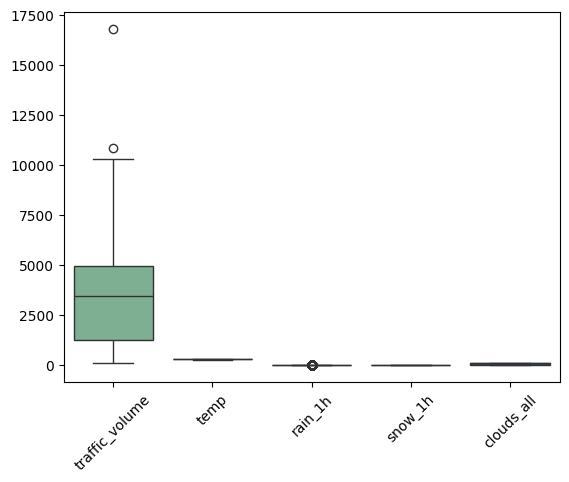

In [67]:
sns.boxplot(data=dataset, palette='crest')
plt.xticks(rotation=45)
plt.show()

In [68]:
dataset.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [69]:
tdata = dataset.set_index('date_time')
tdata.sort_index(inplace=True)

In [70]:
print('The earliest date: \t%s' %tdata.index.values[[0, -1]][0])
print('The latest date: \t%s' %tdata.index.values[[0, -1]][1])

The earliest date: 	2016-11-18T15:00:00.000000000
The latest date: 	2018-09-30T23:00:00.000000000


In [71]:
tdata.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [72]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

encoder = LabelEncoder()

for col in tdata.select_dtypes(include='object').columns:

 tdata[col] = pd.DataFrame(encoder.fit_transform(tdata[col]))

In [73]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         0 non-null      float64
 6   weather_description  0 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 1.2 MB


In [74]:
tdata = tdata.resample('M').mean()
tdata = tdata.asfreq('M')

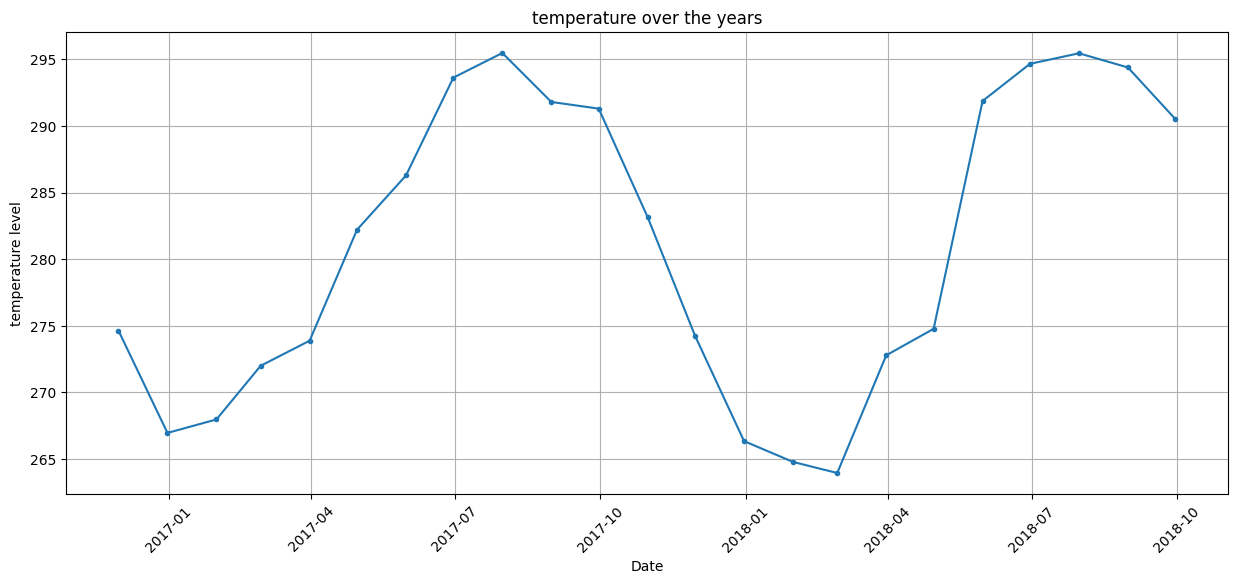

In [75]:
plt.figure(figsize=(15, 6))
plt.plot(tdata['temp'], marker='.')
plt.title('temperature over the years')
plt.xlabel('Date')
plt.ylabel('temperature level')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

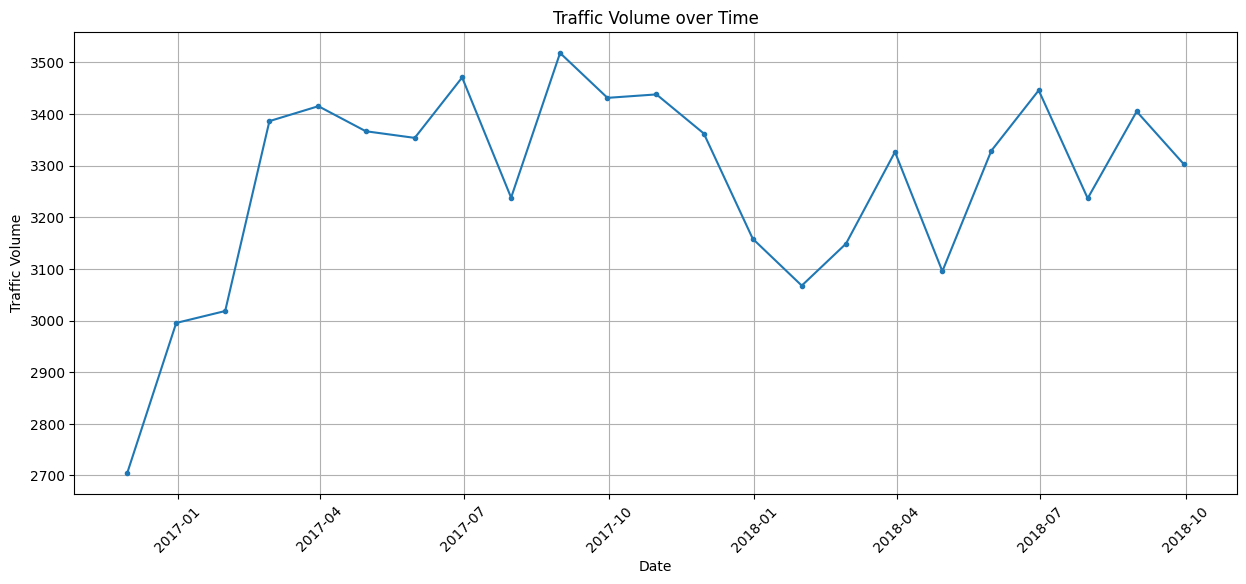

In [76]:
plt.figure(figsize=(15, 6))
plt.plot(tdata['traffic_volume'], marker='.')
plt.title('Traffic Volume over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [77]:
tdata.dropna(inplace=True)

In [78]:

!pip install statsmodels
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
tdata = tdata.asfreq('MS')

In [79]:
result = seasonal_decompose(tdata['traffic_volume'],
                            model ='additive')

result.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
(tdata['traffic_volume'])

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [80]:
dataset.dropna(inplace=True)

In [81]:
dataset.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [82]:
dataset = dataset.set_index('date_time')
dataset.sort_index(inplace=True)
dataset.dropna(inplace=True)


In [83]:
dataset['Day_of_week'] = dataset.index.dayofweek
dataset['month'] = dataset.index.month

In [84]:
dataset['Day_of_year'] = dataset.index.dayofyear

dataset['L1'] = dataset['traffic_volume'].shift(1)
dataset['L2'] = dataset['traffic_volume'].shift(2)


dataset['traffic_volume'] = dataset['traffic_volume'].diff()

In [85]:
dataset.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Day_of_week,month,Day_of_year,L1,L2
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,NaN,274.08,0.0,0.0,90,Snow,heavy snow,4,11,323,NaN,NaN
2016-11-18 15:00:00,0.0,274.08,0.0,0.0,90,Mist,mist,4,11,323,4872.0,NaN
2016-11-18 15:00:00,0.0,274.08,0.0,0.0,90,Fog,fog,4,11,323,4872.0,4872.0
2016-11-18 16:00:00,202.0,273.84,0.0,0.0,90,Snow,heavy snow,4,11,323,4872.0,4872.0
2016-11-18 16:00:00,0.0,273.84,0.0,0.0,90,Mist,mist,4,11,323,5074.0,4872.0


In [86]:
dataset.isna().sum()

,0
traffic_volume,1
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
Day_of_week,0
month,0
Day_of_year,0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [87]:
corr = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='crest')
plt.show()

ValueError: could not convert string to float: 'Snow'

In [88]:
dataset.columns


Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'Day_of_week', 'month',
       'Day_of_year', 'L1', 'L2'],
      dtype='object')

In [89]:
data = dataset[['traffic_volume','L1','L2']]

In [90]:
data.dropna(inplace=True)

<ipython-input-90-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [91]:
X = data[['L1','L2']]
y = data['traffic_volume']

train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train, test =   data.iloc[0:train_size,:], data.iloc[train_size:len(data),:]
y_train, y_test = y.iloc[0:train_size], y.iloc[train_size:len(data)]

print(len(train), len(test))

15982 3996


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [93]:
trainX = np.reshape(train, (train.shape[0], 1, train.shape[1]))
testX = np.reshape(test, (test.shape[0], 1, test.shape[1]))

In [94]:
trainX.shape

(15982, 1, 3)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM



tf.random.set_seed(7)


In [96]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 3)))
model.add(Dense(units=3, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 4)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [97]:
#y_train
y_train_tensor = tf.convert_to_tensor(y_train.values)
y_train_dataset = tf.data.Dataset.from_tensor_slices(y_train_tensor)
y_train = y_train_tensor.numpy()

#ytest
y_test_tensor = tf.convert_to_tensor(y_test.values)
y_test_dataset = tf.data.Dataset.from_tensor_slices(y_test_tensor)
y_test = y_test_tensor.numpy()

In [98]:
history = model.fit(trainX, y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/20
400/400 - 4s - 9ms/step - loss: 590528.1250 - val_loss: 647609.8750
Epoch 2/20
400/400 - 3s - 7ms/step - loss: 590053.3750 - val_loss: 646670.6875
Epoch 3/20
400/400 - 2s - 4ms/step - loss: 588729.4375 - val_loss: 644715.5625
Epoch 4/20
400/400 - 1s - 2ms/step - loss: 586577.8750 - val_loss: 641979.5625
Epoch 5/20
400/400 - 2s - 4ms/step - loss: 583801.0000 - val_loss: 638645.6250
Epoch 6/20
400/400 - 2s - 5ms/step - loss: 580529.5625 - val_loss: 634823.4375
Epoch 7/20
400/400 - 1s - 3ms/step - loss: 576850.0625 - val_loss: 630596.3750
Epoch 8/20
400/400 - 1s - 2ms/step - loss: 572844.1250 - val_loss: 626044.4375
Epoch 9/20
400/400 - 1s - 2ms/step - loss: 568575.4375 - val_loss: 621219.6875
Epoch 10/20
400/400 - 1s - 2ms/step - loss: 564085.8750 - val_loss: 616152.5625
Epoch 11/20
400/400 - 1s - 3ms/step - loss: 559385.3125 - val_loss: 610844.5625
Epoch 12/20
400/400 - 1s - 2ms/step - loss: 554473.3750 - val_loss: 605282.5625
Epoch 13/20
400/400 - 1s - 2ms/step - loss: 54933

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [99]:
testPredict = model.predict(testX)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

MAE: 451.76
MSE: 436504.71
RMSE: 660.69


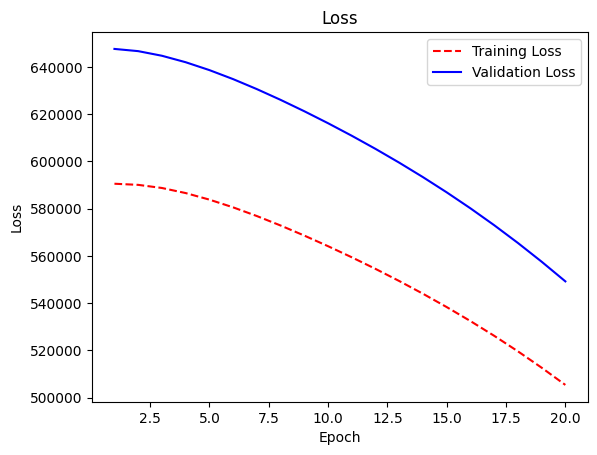

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred = testPredict.flatten()

#Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Get training and validation loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, 20 + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss")
plt.show()

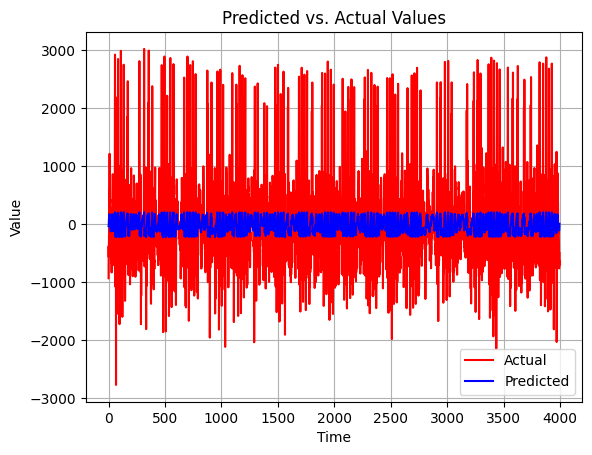

In [101]:
#Plot

#plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual', color='red')
plt.plot(y_pred, label='Predicted', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(dataset['traffic_volume'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3014: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     traffic_volume   No. Observations:                19980
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sun, 25 Aug 2024   AIC                             10.000
Time:                                    18:54:08   BIC                             49.509
Sample:                                         0   HQIC                            22.927
                                          - 19980                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000         -0        inf      0.000      -1.000      -1.000
ar.S.L12      -2.0000   9.06e-09  -2.21e+08      0.000      -2.000      -2.000
ar.S.L24      -1.0000   5.84e-09  -1.71e+08      0.000      -1.000      -1.000
ma.S.L12      -1.0000         -0        inf      0.000      -1.000      -1.000
sigma2      1.386e+12         -0       -inf      0.000    1.39e+12    1.39e+12
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [106]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [107]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

rmse(y_test, predictions)


mean_squared_error(y_test, predictions)

1663148171.8420217

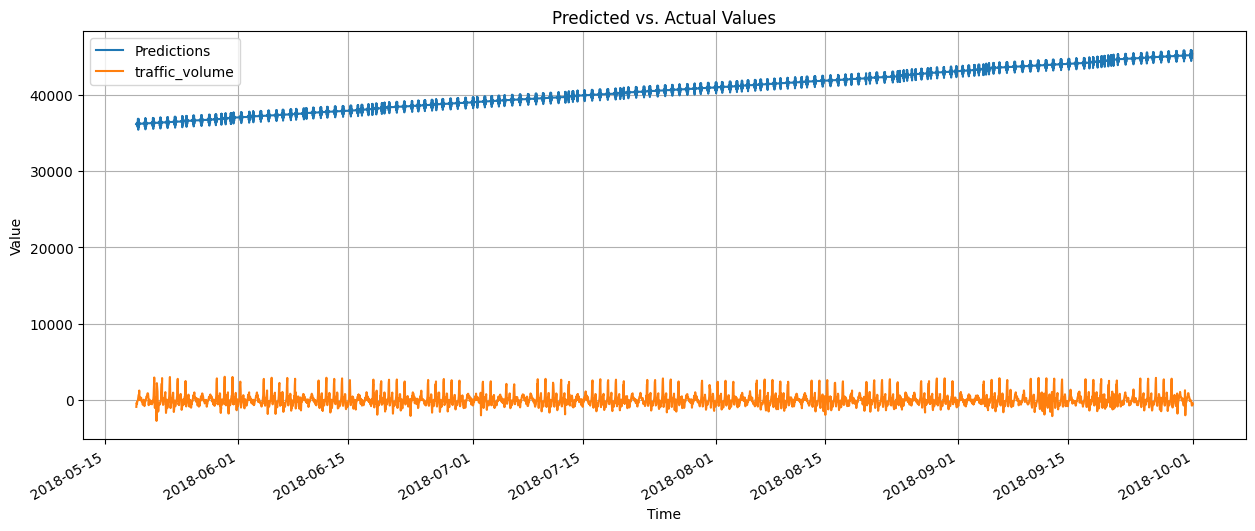

In [108]:
plt.figure(figsize=(15, 6))
predictions.plot(legend = True)
y.iloc[train_size:len(dataset)].plot(legend = True)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: